In [1]:
# Dependancies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
import os

# File load
file1 = os.path.join('csv_exports', 'Shootings.csv' )
file2 = os.path.join('csv_exports', 'Census.csv' )
file3 = os.path.join('csv_exports', 'Combined.csv' )

# File read
shootings_df = pd.read_csv(file1)
census = pd.read_csv(file2)
combined = pd.read_csv(file3)

In [2]:
shootings_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,abbreviation,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,Male,Asian,Shelton,Washington,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,Male,White,Aloha,Oregon,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,Kansas,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,California,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,Male,Hispanic,Evans,Colorado,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5437,5954,James Tober,2020-06-28,shot,gun,68.0,Male,Unknown,Kettering,Ohio,OH,True,attack,Not fleeing,False
5438,5953,John Parks,2020-06-29,shot,undetermined,57.0,Male,White,Paducah,Kentucky,KY,False,undetermined,Car,False
5439,5958,Wade Russell Meisberger,2020-06-29,shot,gun,48.0,Male,White,Hazleton,Pennsylvania,PA,False,attack,Car,False
5440,5962,Brittany S. Teichroeb,2020-06-29,shot,gun,26.0,Female,White,Midland,Texas,TX,False,other,Other,False


In [3]:
total_deaths = len(shootings_df['id'].value_counts())
total_deaths

5442

In [4]:
# Calculate race totals and percentages per race
race_count = shootings_df["race"].value_counts()
race_percent = (race_count / total_deaths) * 100

# Summary 
racial_demographics = pd.DataFrame({"Total Fatal Shooting Deaths": race_count,"Percentage of Deaths": race_percent})

# Clean/format
racial_demographics["Percentage of Deaths"] = racial_demographics["Percentage of Deaths"].map('{0:,.2f}%'.format)

# Display
racial_demographics


,Total Fatal Shooting Deaths,Percentage of Deaths
White,2494,45.83%
Black,1298,23.85%
Hispanic,906,16.65%
Unknown,524,9.63%
Asian,94,1.73%
Native American,78,1.43%
Other,48,0.88%


In [52]:
shot_racial_demo = shootings_df.loc[(shootings_df["manner_of_death"] == "shot")]
shot_race_count = shot_racial_demo["race"].value_counts()
shot_tasered_race_count = racial_demographics_manner_of_death["Total Fatal Shooting Deaths"] - shot_race_count

#creating new datafram to add percentage for each manner of death
racial_demographics_manner_of_death = racial_demographics

#calculating percentage for each manner of death
shot_percent = (shot_race_count/racial_demographics_manner_of_death["Total Fatal Shooting Deaths"])*100
shot_tasered_percent = 100 - shot_percent

racial_demographics_manner_of_death["Total Shot"] = shot_race_count
racial_demographics_manner_of_death["Total Shot and Tasered"] = shot_tasered_race_count
racial_demographics_manner_of_death["Percentage Shot"] = shot_percent
racial_demographics_manner_of_death["Percentage Shot and Tasered"] = shot_tasered_percent

# Clean/format
racial_demographics_manner_of_death["Percentage Shot"] = racial_demographics_manner_of_death["Percentage Shot"].map('{0:,.2f}%'.format)
racial_demographics_manner_of_death["Percentage Shot and Tasered"] = (racial_demographics_manner_of_death["Percentage Shot and Tasered"]
                                                                      .map('{0:,.2f}%'.format))
racial_demographics_manner_of_death

,Total Fatal Shooting Deaths,Percentage of Deaths,Percentage Shot,Percentage Shot and Tasered,Total Shot,Total Shot and Tasered
White,2494,45.83%,95.35%,4.65%,2378,116
Black,1298,23.85%,94.68%,5.32%,1229,69
Hispanic,906,16.65%,94.59%,5.41%,857,49
Unknown,524,9.63%,95.23%,4.77%,499,25
Asian,94,1.73%,91.49%,8.51%,86,8
Native American,78,1.43%,98.72%,1.28%,77,1
Other,48,0.88%,89.58%,10.42%,43,5


Racial Demographics - Pie Chart

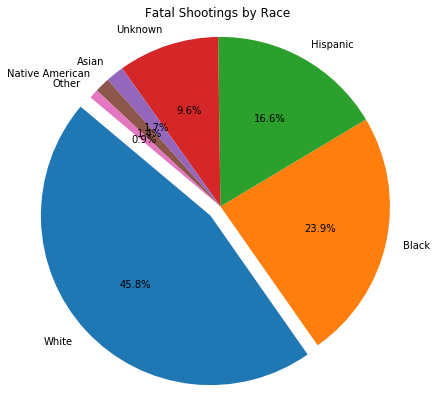

In [44]:
races = racial_demographics_manner_of_death.index.array
explode = explode = (0.08,0,0,0,0,0,0)
plt.pie(race_count, labels=races, explode=explode, autopct="%1.1f%%", startangle=140, labeldistance=1.1)
plt.axis("equal")
plt.title("Fatal Shootings by Race")
plt.gcf().set_size_inches(7,7)
plt.show()

In [59]:
shot_list = racial_demographics_manner_of_death["Total Shot"].tolist()
shot_tasered_list = racial_demographics_manner_of_death["Total Shot and Tasered"].tolist()

manner_of_death_list = np.vstack((shot_list, shot_tasered_list)).T

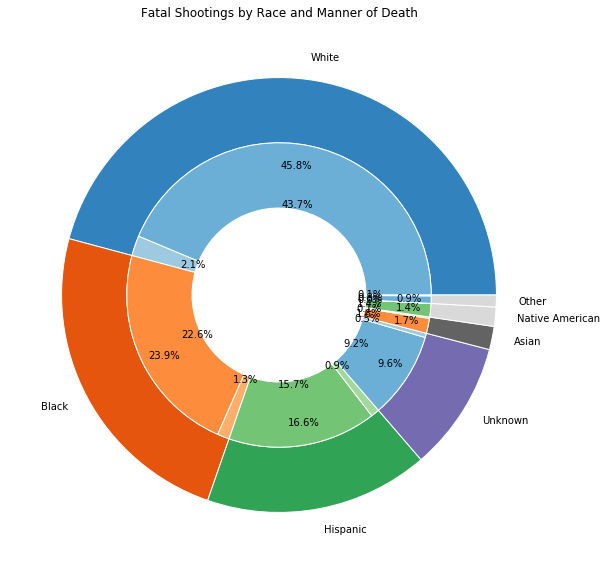

In [72]:
fig, ax = plt.subplots()

size = 0.3

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(7)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(race_count, labels=races, radius=1, colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w'), autopct="%1.1f%%")

ax.pie(manner_of_death_list.flatten(), radius=1-size, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'), autopct="%1.1f%%")

ax.set(aspect="equal", title="Fatal Shootings by Race and Manner of Death")
plt.gcf().set_size_inches(10,10)
plt.show()